# Synthetic Population Exploration
This notebook explores the synthetic life insurance population dataset (10,000 records) and visualizes distributions and risk patterns.

In [1]:
# Imports and setup
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot settings
%matplotlib inline
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
# Load dataset and quick overview
data_path = Path.cwd()  # Notebook is saved next to the data file
json_file = data_path / "synthetic_life_insurance_10000.json"
with open(json_file, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
display(df.head())
print("\nShape:", df.shape)
print("\nInfo:")
df.info()
display(df.describe(include="all"))
print("\nAvg risk score: {:.2%}".format(df["risk_score"].mean()))

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,regular_medication,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,risk_score,underwriter_score,underwriter_decision,premium_loading
0,m,21,divorced,170.2,80.2,27.7,True,0,False,0.0,...,False,warning,0,228916,2006,0.862138,0.100210,0.1003,accept_with_premium,0.1
1,f,61,divorced,184.0,114.5,33.8,False,0,True,4.3,...,False,warning,9,80407,2010,3.148462,0.809681,0.9773,reject,0.0
2,m,23,married,174.2,92.3,30.4,False,0,False,0.0,...,False,safe,6,100765,2010,1.052512,0.201020,0.1835,accept_with_premium,0.6
3,m,59,single,154.2,61.0,25.6,False,0,False,0.0,...,True,warning,8,98876,2010,2.013339,0.479948,0.5594,reject,0.0
4,f,69,divorced,172.5,83.8,28.2,False,0,True,1.0,...,False,safe,1,208706,2009,2.720745,0.706771,0.7553,reject,0.0



Shape: (10000, 29)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      10000 non-null  object 
 1   age                         10000 non-null  int64  
 2   marital_status              10000 non-null  object 
 3   height_cm                   10000 non-null  float64
 4   weight_kg                   10000 non-null  float64
 5   bmi                         10000 non-null  float64
 6   smoking                     10000 non-null  bool   
 7   packs_per_week              10000 non-null  int64  
 8   drug_use                    10000 non-null  bool   
 9   drug_frequency              10000 non-null  float64
 10  drug_type                   10000 non-null  object 
 11  staying_abroad              10000 non-null  bool   
 12  abroad_type                 10000 non-null  object 
 13  dange

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,regular_medication,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,risk_score,underwriter_score,underwriter_decision,premium_loading
count,10000,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,...,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,2,NaN,4,NaN,NaN,NaN,2,NaN,2,NaN,...,2,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,m,NaN,married,NaN,NaN,NaN,False,NaN,False,NaN,...,False,safe,NaN,NaN,NaN,NaN,NaN,NaN,reject,NaN
freq,5086,NaN,2550,NaN,NaN,NaN,7444,NaN,9025,NaN,...,7574,6008,NaN,NaN,NaN,NaN,NaN,NaN,6405,NaN
mean,NaN,51.27760,NaN,170.283720,74.278230,25.536480,NaN,0.388900,NaN,0.269630,...,NaN,NaN,4.997200,139280.614300,2007.514900,2.348175,0.500000,0.493758,NaN,0.086087
std,NaN,19.64992,NaN,9.790955,14.117135,3.861814,NaN,0.874376,NaN,0.912998,...,NaN,NaN,3.180692,63149.462922,1.715772,1.549440,0.288718,0.291675,NaN,0.225264
min,NaN,18.00000,NaN,145.000000,34.500000,16.000000,NaN,0.000000,NaN,0.000000,...,NaN,NaN,0.000000,30011.000000,2005.000000,0.642791,0.000000,0.000000,NaN,0.000000
25%,NaN,34.00000,NaN,163.500000,64.300000,22.900000,NaN,0.000000,NaN,0.000000,...,NaN,NaN,2.000000,84910.250000,2006.000000,1.270913,0.250000,0.242200,NaN,0.000000
50%,NaN,51.00000,NaN,170.250000,73.300000,25.500000,NaN,0.000000,NaN,0.000000,...,NaN,NaN,5.000000,139804.500000,2008.000000,2.090161,0.500000,0.483950,NaN,0.000000
75%,NaN,68.00000,NaN,177.100000,83.200000,28.200000,NaN,0.000000,NaN,0.000000,...,NaN,NaN,8.000000,193509.750000,2009.000000,2.850946,0.750000,0.738600,NaN,0.000000



Avg risk score: 50.00%


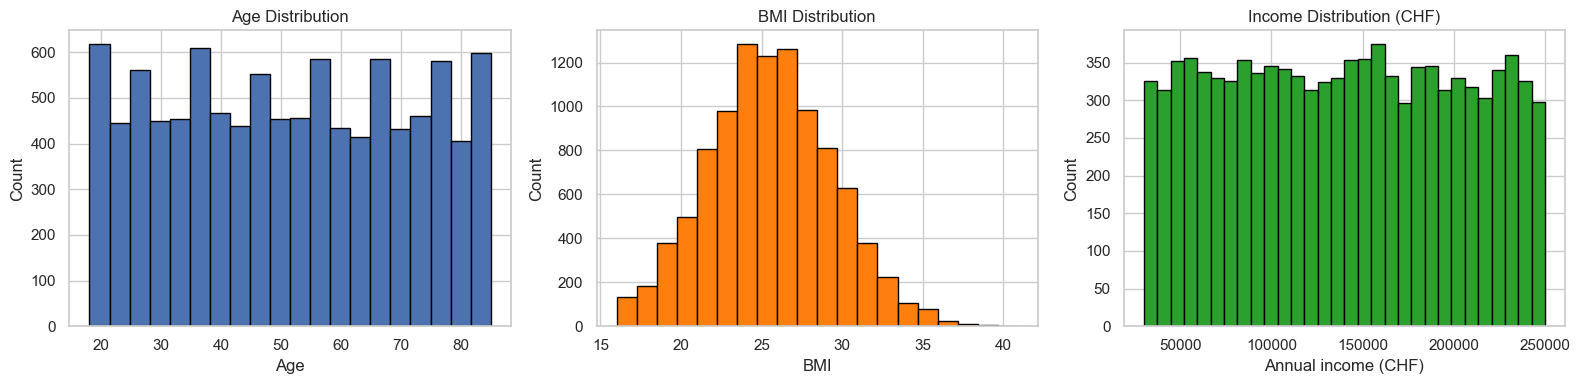

In [3]:
# Distributions: Age, BMI, Income
fig, axes = plt.subplots(1, 3, figsize=(16,4))

axes[0].hist(df["age"], bins=20, edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

axes[1].hist(df["bmi"], bins=20, edgecolor="black", color="tab:orange")
axes[1].set_title("BMI Distribution")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

axes[2].hist(df["earning_chf"], bins=30, edgecolor="black", color="tab:green")
axes[2].set_title("Income Distribution (CHF)")
axes[2].set_xlabel("Annual income (CHF)")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

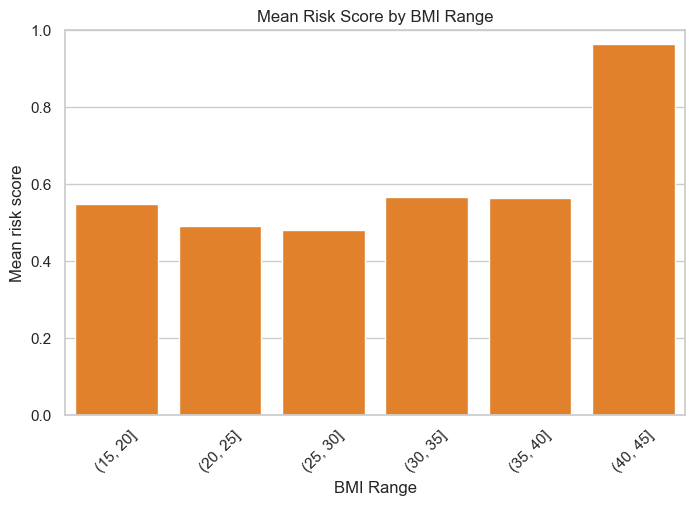

In [4]:
# Mean risk score by BMI Ranges
bmi_bins = [15,20,25,30,35,40,45]
bmi_groups = pd.cut(df["bmi"], bins=bmi_bins, right=True)
agg_bmi = (df.assign(bmi_group=bmi_groups)
          .groupby("bmi_group", observed=False)["risk_score"].mean()
          .reset_index(name="mean_risk"))

sns.barplot(data=agg_bmi, x="bmi_group", y="mean_risk", color="tab:orange")
plt.title("Mean Risk Score by BMI Range")
plt.ylabel("Mean risk score")
plt.xlabel("BMI Range")
plt.xticks(rotation=45)
plt.ylim(0, min(1, agg_bmi["mean_risk"].max()*1.15))
plt.show()

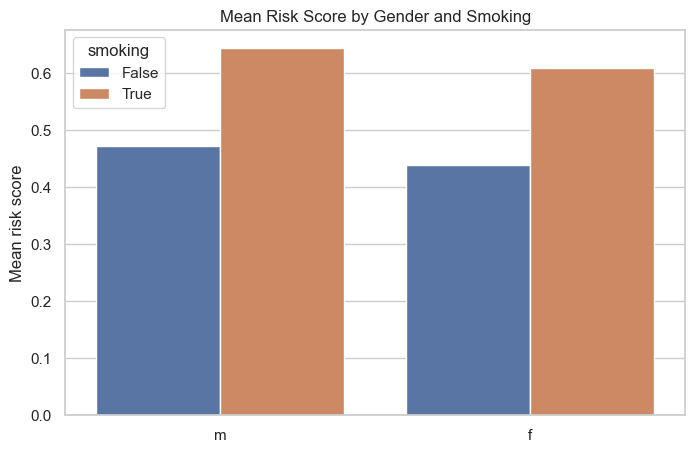

In [5]:
# Mean risk score by Gender and Smoking
sns.barplot(x="gender", y="risk_score", hue="smoking", data=df, estimator=np.mean, errorbar=None)
plt.title("Mean Risk Score by Gender and Smoking")
plt.ylabel("Mean risk score")
plt.xlabel("")
plt.show()

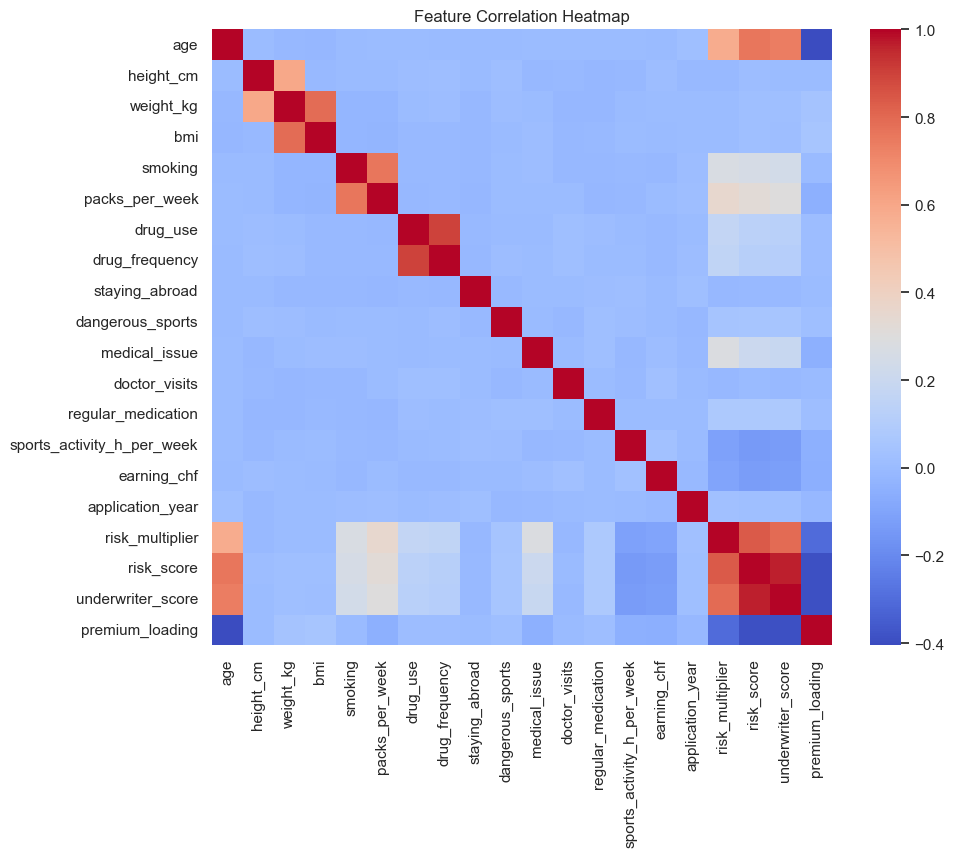

In [6]:
# Correlation heatmap (numeric + bool)
num_df = df.select_dtypes(include=["number", "bool"]).astype(float)
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Load the decision-enriched dataset (same file)
from pathlib import Path
import json
import pandas as pd

v2_path = Path.cwd() / "synthetic_life_insurance_10000.json"
with open(v2_path, "r", encoding="utf-8") as f:
    data_v2 = json.load(f)
df_v2 = pd.DataFrame(data_v2)
display(df_v2.head())
print("\nShape:", df_v2.shape)
print("Avg risk score: {:.2%}".format(df_v2["risk_score"].mean()))
print("Decision mix:\n", df_v2["underwriter_decision"].value_counts())

,gender,age,marital_status,height_cm,weight_kg,bmi,smoking,packs_per_week,drug_use,drug_frequency,...,regular_medication,medication_type,sports_activity_h_per_week,earning_chf,application_year,risk_multiplier,risk_score,underwriter_score,underwriter_decision,premium_loading
0,m,21,divorced,170.2,80.2,27.7,True,0,False,0.0,...,False,warning,0,228916,2006,0.862138,0.100210,0.1003,accept_with_premium,0.1
1,f,61,divorced,184.0,114.5,33.8,False,0,True,4.3,...,False,warning,9,80407,2010,3.148462,0.809681,0.9773,reject,0.0
2,m,23,married,174.2,92.3,30.4,False,0,False,0.0,...,False,safe,6,100765,2010,1.052512,0.201020,0.1835,accept_with_premium,0.6
3,m,59,single,154.2,61.0,25.6,False,0,False,0.0,...,True,warning,8,98876,2010,2.013339,0.479948,0.5594,reject,0.0
4,f,69,divorced,172.5,83.8,28.2,False,0,True,1.0,...,False,safe,1,208706,2009,2.720745,0.706771,0.7553,reject,0.0



Shape: (10000, 29)
Avg risk score: 50.00%
Decision mix:
 underwriter_decision
reject                 6405
accept_with_premium    1551
accept                 1023
needs_more_info        1021
Name: count, dtype: int64


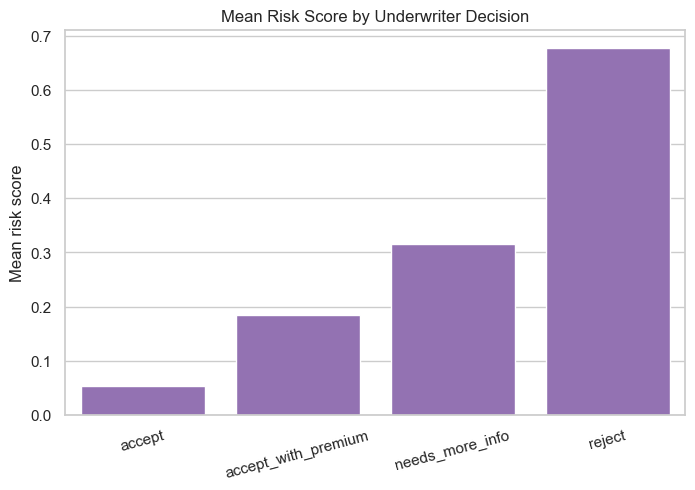

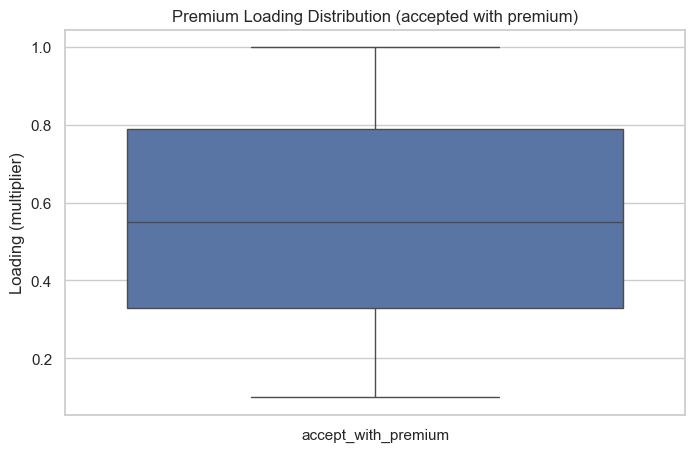

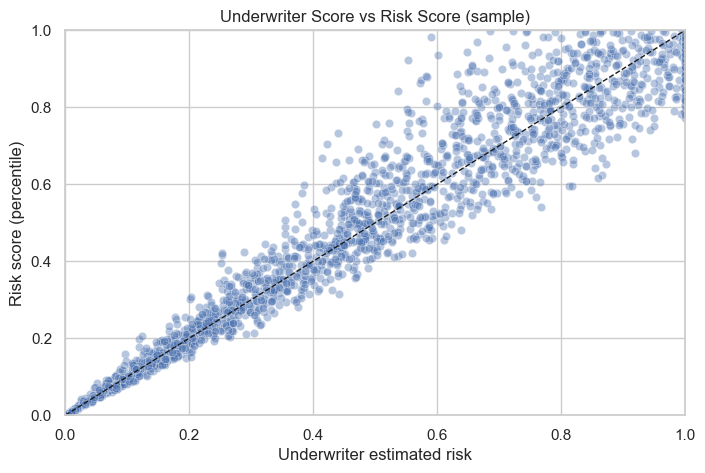

In [8]:
# Decision outcomes: risk quality
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Mean risk score by decision category
dec_risk = (df_v2.groupby("underwriter_decision")["risk_score"].mean().reset_index())
sns.barplot(data=dec_risk, x="underwriter_decision", y="risk_score", color="tab:purple")
plt.title("Mean Risk Score by Underwriter Decision")
plt.ylabel("Mean risk score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.show()

# Premium distribution (accepted with premium)
ax = sns.boxplot(data=df_v2[df_v2["underwriter_decision"]=="accept_with_premium"], x="underwriter_decision", y="premium_loading")
ax.set_title("Premium Loading Distribution (accepted with premium)")
ax.set_xlabel("")
ax.set_ylabel("Loading (multiplier)")
plt.show()

# Calibration check: underwriter vs true (risk score)
sns.scatterplot(data=df_v2.sample(min(2000, len(df_v2)), random_state=0), x="underwriter_score", y="risk_score", alpha=0.4)
plt.plot([0,1],[0,1],"k--", lw=1)
plt.title("Underwriter Score vs Risk Score (sample)")
plt.xlabel("Underwriter estimated risk")
plt.ylabel("Risk score (percentile)")
plt.xlim(0,1); plt.ylim(0,1)
plt.show()